## Artificial Intelligence for Cybersecurity Project
### Dataset used: [Malicious URLs dataset by Manu Siddhartha](https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset)

### Candidates: Riccardo Fantasia & Leonardo Pantani

In [1]:
# removing warnings from prints
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing raw dataset
import pandas as pd
df_raw = pd.read_csv("UNIPI-IA-dataset.csv")

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xe. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [3]:
# we define the types in a specific order. This is because in case of duplicates, for example:
# https://www.strange-site.com/youwonaprize- malware
# https://www.strange-site.com/youwonaprize - benign
#
# we would remove all samples, except the first one. This was decided because, in this context,
# it is preferable to have a False Positive (FP), manually "correctable" by the user, than a False Negative (FN),
# which could expose the user to a malicious site.

types = ["malware", "phishing", "defacement", "benign"]

df_raw["type"] = pd.Categorical(df_raw["type"], categories=types, ordered=True)
df = df_raw.sort_values(by="type").drop_duplicates(subset="url", keep="first")

print(f"Samples in original dataset: {df_raw.shape[0]}\nSamples in no-duplicates dataset: {df.shape[0]} ({((df_raw.shape[0] - df.shape[0]) / df_raw.shape[0]) * 100:.2f}% reduction)")


Samples in original dataset: 651191
Samples in no-duplicates dataset: 641119 (1.55% reduction)


In [4]:
# show for each class the number of urls in the dataset
from plotly import graph_objects as go
total_count = df['type'].shape[0]
count = df['type'].value_counts()
percentages = (count / total_count * 100).round(2)
colors = ['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6', '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D']

fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors), text=[f"{p}%" for p in percentages], textposition='outside', textfont=dict(color='black'))])
fig.update_layout(xaxis_title='Labels', yaxis_title='no. of URLs', title='Counts for different labels', plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', font=dict(color='black'))
fig.show()

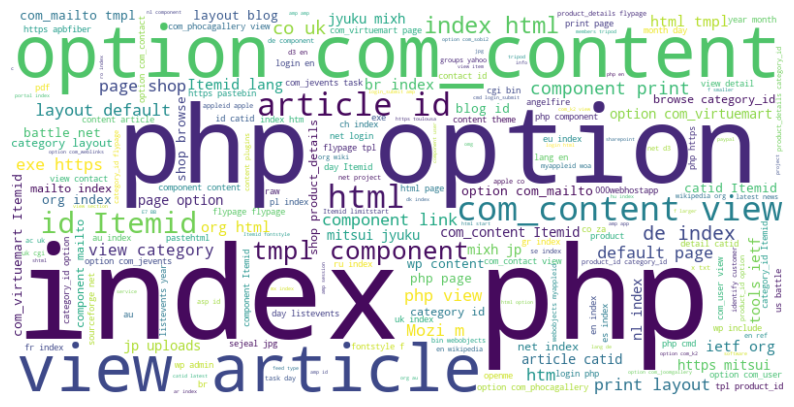

In [5]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
malicious_df = df[df['type'].isin(['malware', 'phishing', 'defacement'])]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(malicious_df['url']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [6]:
# extracting 24 features
from utils.features_extractors import (extract_feature_ip_use,extract_feature_url_entropy,extract_feature_num_digits,extract_feature_url_length,extract_feature_num_query_parameters,extract_feature_num_fragments,extract_feature_num_percent20,extract_feature_num_at_signs,extract_feature_has_http,extract_feature_has_https,extract_feature_dot_number,extract_feature_num_www, extract_feature_directory_num,extract_feature_embed_domain_number,extract_feature_suspiciousurl,extract_feature_count_percent,extract_feature_count_dash,extract_feature_count_equal,extract_feature_is_shortened,extract_feature_hostname_length,extract_feature_first_directory_length,extract_feature_top_level_domain_length,extract_feature_num_letters,extract_feature_num_subdomains)

df['ip_use'] = df['url'].apply(extract_feature_ip_use)
df['url_entropy'] = df['url'].apply(extract_feature_url_entropy)
df['num_digits'] = df['url'].apply(extract_feature_num_digits)
df['url_length'] = df['url'].apply(extract_feature_url_length)
df['num_query_parameters'] = df['url'].apply(extract_feature_num_query_parameters)
df['num_fragments'] = df['url'].apply(extract_feature_num_fragments)
df['num_percent20'] = df['url'].apply(extract_feature_num_percent20)
df['num_at_signs'] = df['url'].apply(extract_feature_num_at_signs)
df['has_http'] = df['url'].apply(extract_feature_has_http)
df['has_https'] = df['url'].apply(extract_feature_has_https)
df['dot_number'] = df['url'].apply(extract_feature_dot_number)
df['num_www'] = df['url'].apply(extract_feature_num_www)
df['directory_num'] = df['url'].apply(extract_feature_directory_num)
df['embed_domain_number'] = df['url'].apply(extract_feature_embed_domain_number)
df['suspiciousurl'] = df['url'].apply(extract_feature_suspiciousurl)
df['count_percent'] = df['url'].apply(extract_feature_count_percent)
df['count_dash'] = df['url'].apply(extract_feature_count_dash)
df['count_equal'] = df['url'].apply(extract_feature_count_equal)
df['is_shortened'] = df['url'].apply(extract_feature_is_shortened)
df['hostname_length'] = df['url'].apply(extract_feature_hostname_length)
df['first_directory_length'] = df['url'].apply(extract_feature_first_directory_length)
df['top_level_domain_length'] = df['url'].apply(extract_feature_top_level_domain_length)
df['num_letters'] = df['url'].apply(extract_feature_num_letters)
df['num_domains'] = df['url'].apply(extract_feature_num_subdomains)

print(f"Total no. of features: { df.drop(columns=['type', 'url']).shape[1] }")

Total no. of features: 24


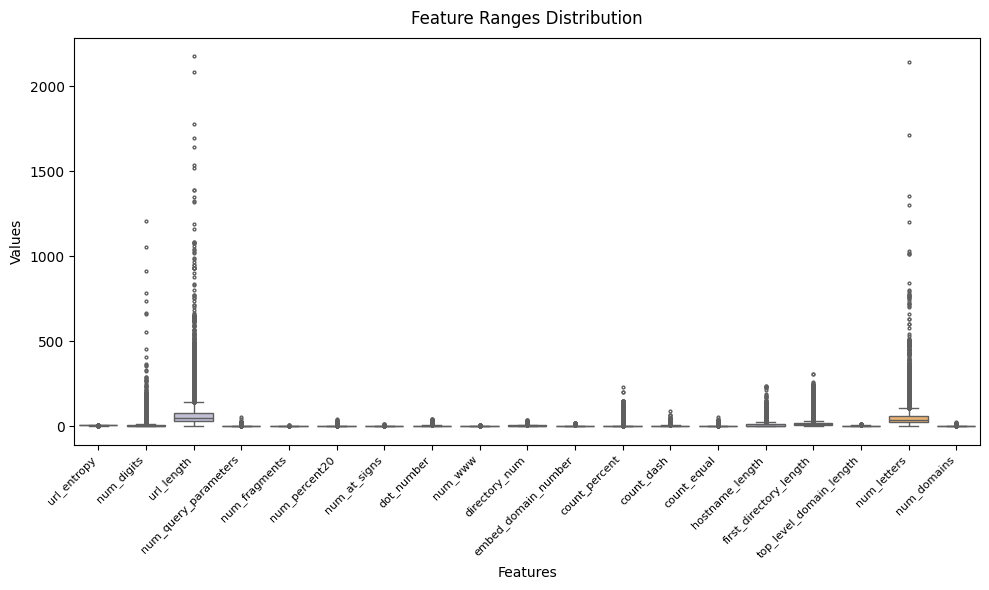

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric and binary features
features_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_exclude = ['ip_use', 'has_http', 'has_https', 'suspiciousurl', 'is_shortened']
features_to_plot = [f for f in features_to_plot if f not in features_to_exclude]

# Create figure with subplots
plt.figure(figsize=(10, 6))  # Reduce figure size for better compactness

# Create box plot for each feature
sns.boxplot(data=df[features_to_plot], palette='Set3', fliersize=2)  # Reduce fliersize for better clarity

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)  # Smaller font size for x-axis labels

plt.title('Feature Ranges Distribution', pad=10, fontsize=12)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Values', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


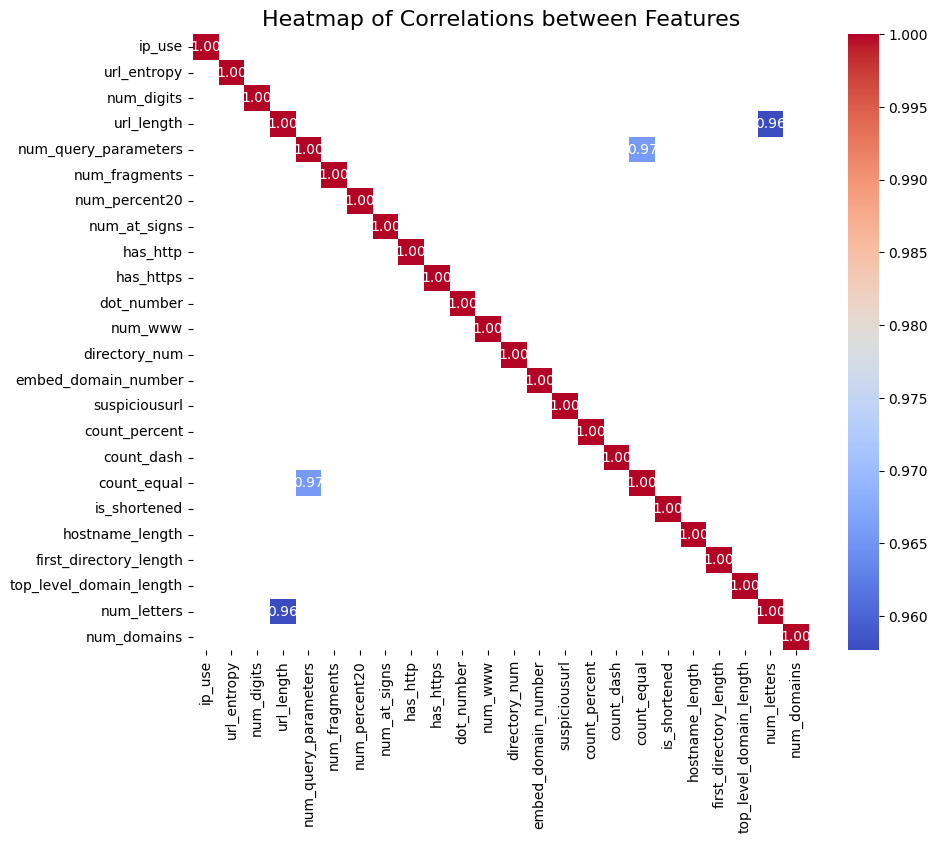

In [8]:
# showing features heatmap

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df.drop(columns=['type', 'url']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, mask = (np.abs(correlation_matrix) <= 0.9))
plt.title("Heatmap of Correlations between Features", fontsize=16)
plt.show()

In [9]:
# we will remove, given the heatmap, the features with a correlation >= 0.9. List:
#count_equal, url_length
df = df.drop(columns=[ "count_equal", "url_length"])

print(f"Total no. of features after removal: { df.drop(columns=['type', 'url']).shape[1] }")
print(f"Features list: {df.drop(columns=['type', 'url']).columns.tolist()}" )

Total no. of features after removal: 22
Features list: ['ip_use', 'url_entropy', 'num_digits', 'num_query_parameters', 'num_fragments', 'num_percent20', 'num_at_signs', 'has_http', 'has_https', 'dot_number', 'num_www', 'directory_num', 'embed_domain_number', 'suspiciousurl', 'count_percent', 'count_dash', 'is_shortened', 'hostname_length', 'first_directory_length', 'top_level_domain_length', 'num_letters', 'num_domains']


In [10]:
# we divide the dataset into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
from utils.utils import printInfo

train_ratio = 0.80
test_ratio = 0.20
x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(df.drop(columns=["type", "url"]).copy(), df["type"].copy(), test_size=1-train_ratio, shuffle=True, stratify=df["type"].copy())

printInfo("training with outliers", y_train_unbalanced)

training with outliers samples [tot: 512895]:
 benign class: 342459 (66.77% of total)
 defacement class: 76246 (14.87% of total)
 phishing class: 75274 (14.68% of total)
 malware class: 18916 (3.69% of total)


In [11]:
# We remove outliers from the training set.
# We decided to set a fairly conservative threshold (3x IQR) given the nature of the numerous outliers, which do not arise from measurement errors, 
# but represent possible malicious URLs or edge cases. Removing them too aggressively (1.5xIQR) would risk losing relevant examples for the model. 
# The larger threshold maximizes the retention of potentially informative data while reducing excessive extreme values.
from utils.utils import remove_outliers

x_train_clean_unbalanced = remove_outliers(x_train_unbalanced)
y_train_clean_unbalanced = y_train_unbalanced[x_train_clean_unbalanced.index]

printInfo("training without outliers", y_train_clean_unbalanced)
print(f"Reduction of the training dataset by {x_train_unbalanced.shape[0] - x_train_clean_unbalanced.shape[0]} elements ({((x_train_unbalanced.shape[0] - x_train_clean_unbalanced.shape[0]) / x_train_unbalanced.shape[0]) * 100:.2f}% reduction)")

printInfo("test", y_test)

training without outliers samples [tot: 487347]:
 benign class: 327011 (67.10% of total)
 defacement class: 72954 (14.97% of total)
 phishing class: 71558 (14.68% of total)
 malware class: 15824 (3.25% of total)
Reduction of the training dataset by 25548 elements (4.98% reduction)
test samples [tot: 128224]:
 benign class: 85615 (66.77% of total)
 defacement class: 19062 (14.87% of total)
 phishing class: 18818 (14.68% of total)
 malware class: 4729 (3.69% of total)


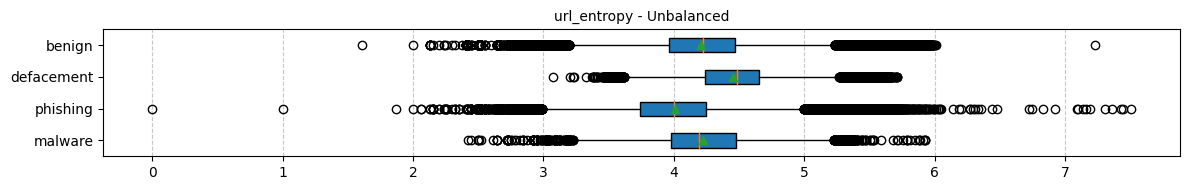

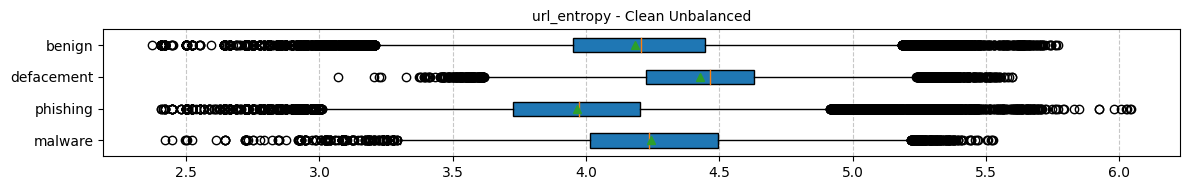

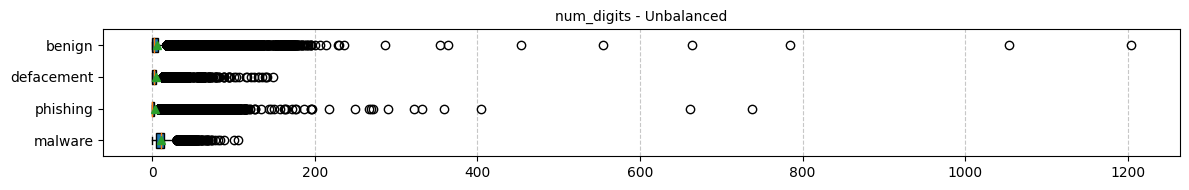

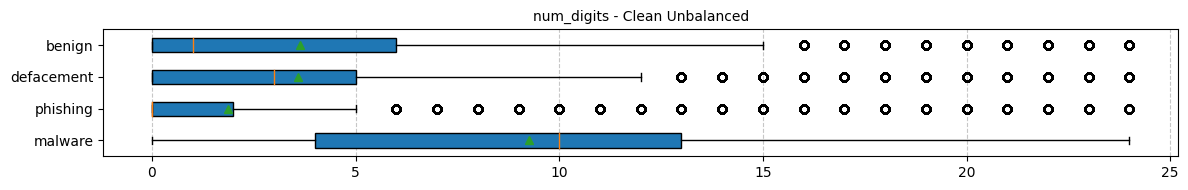

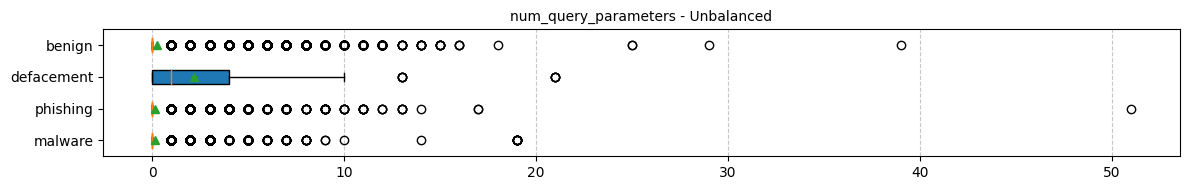

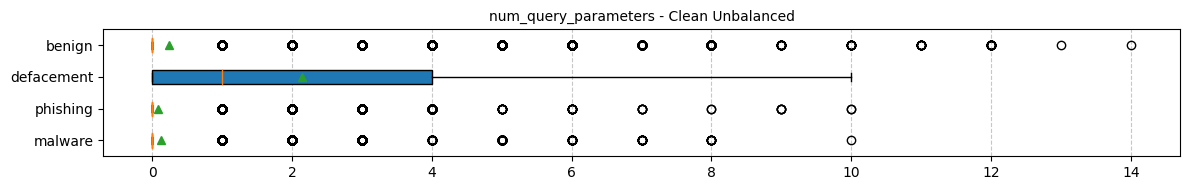

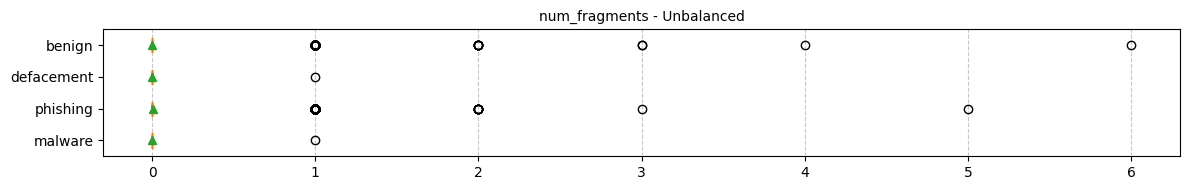

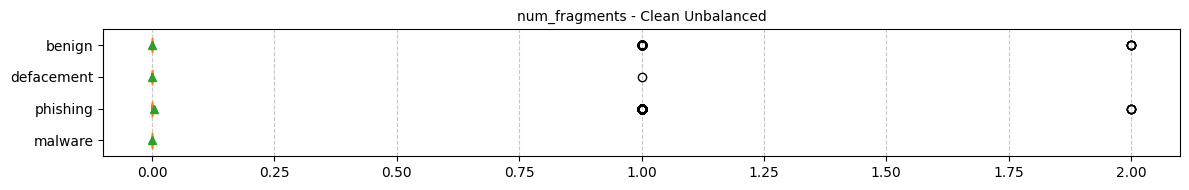

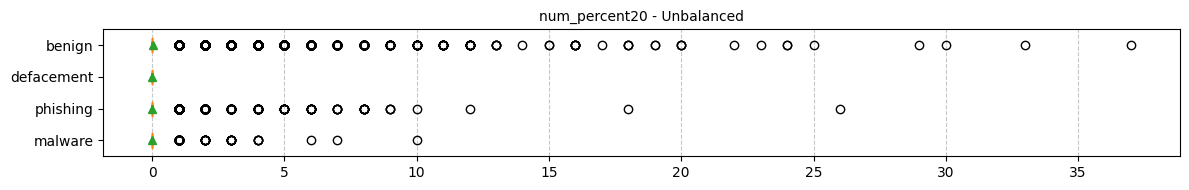

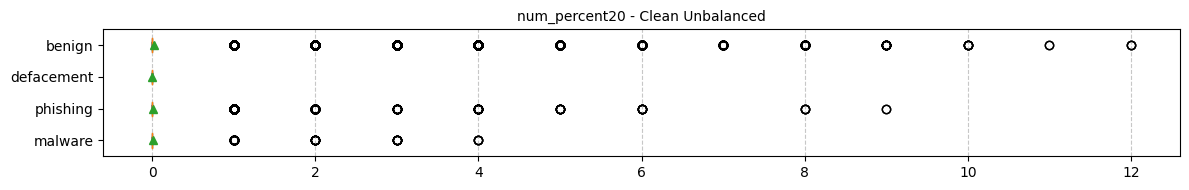

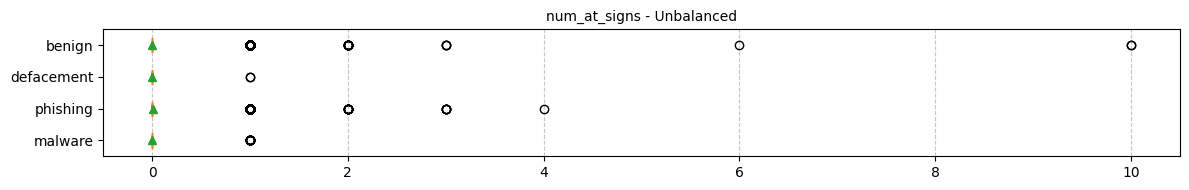

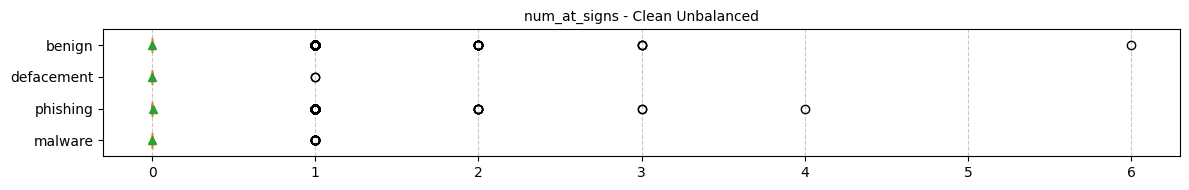

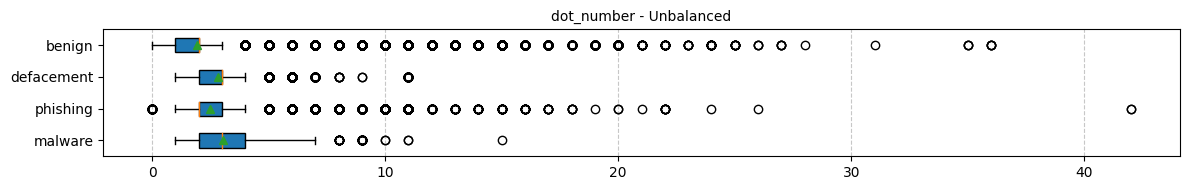

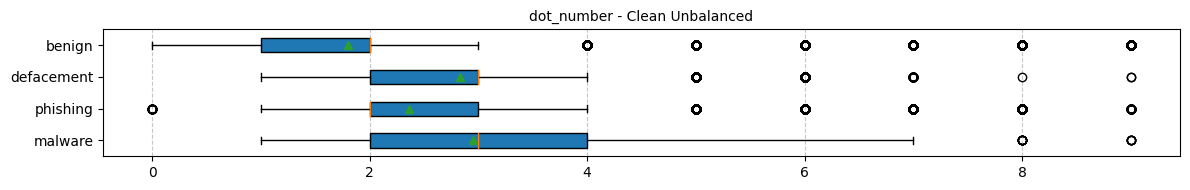

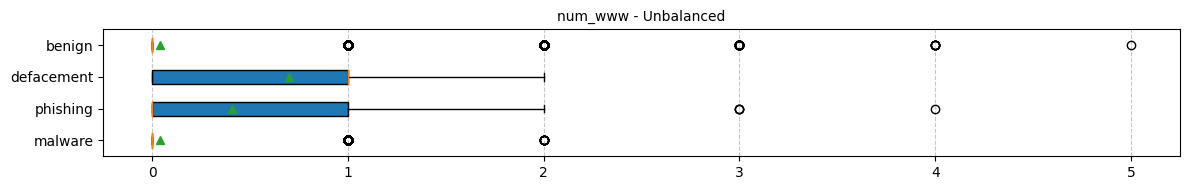

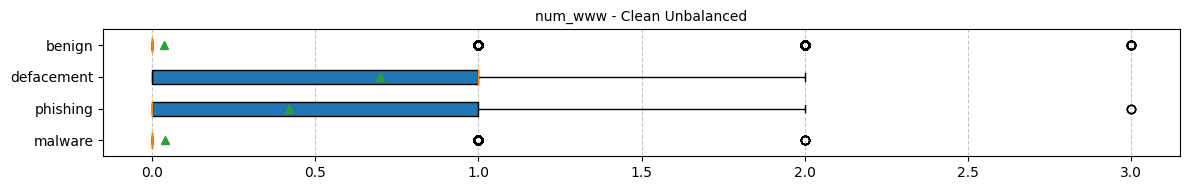

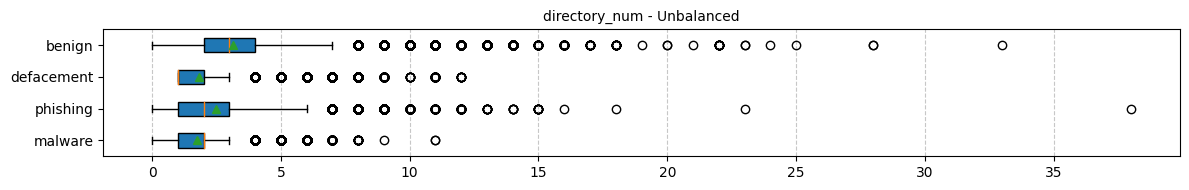

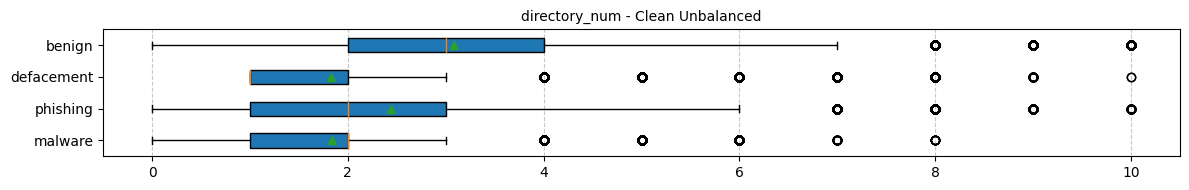

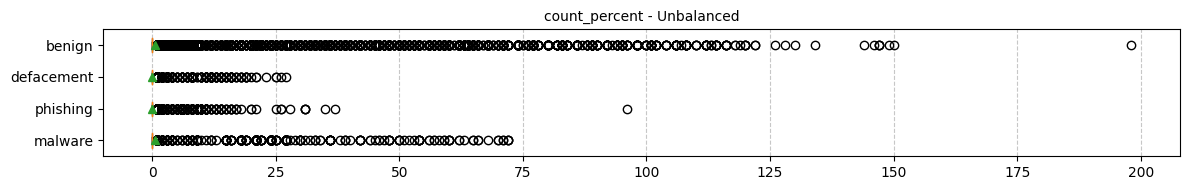

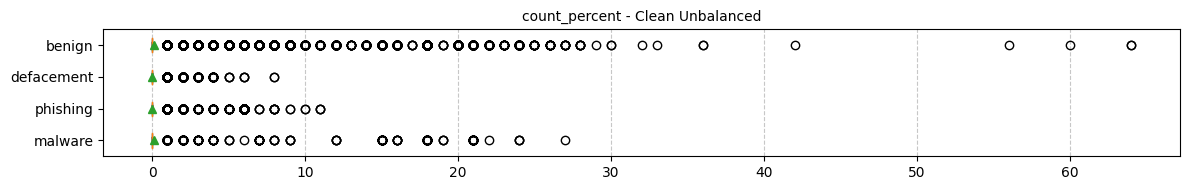

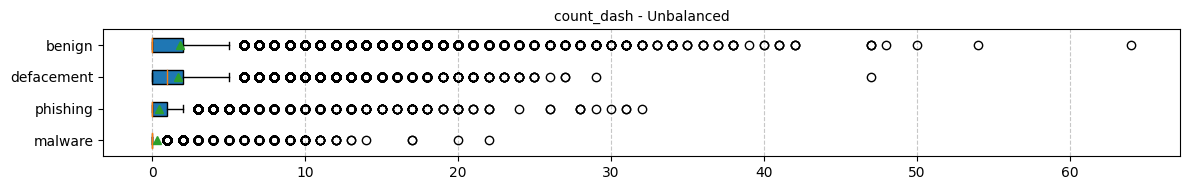

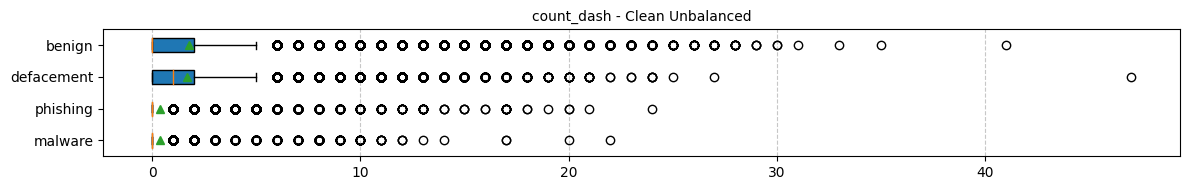

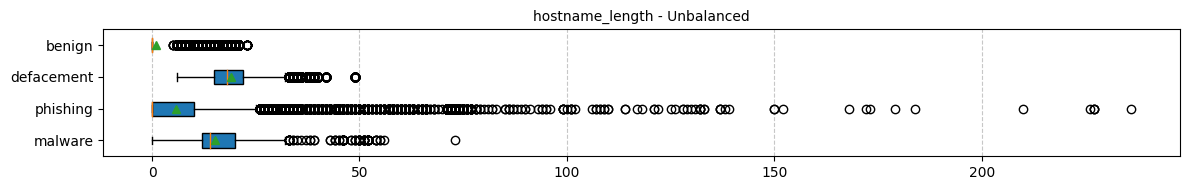

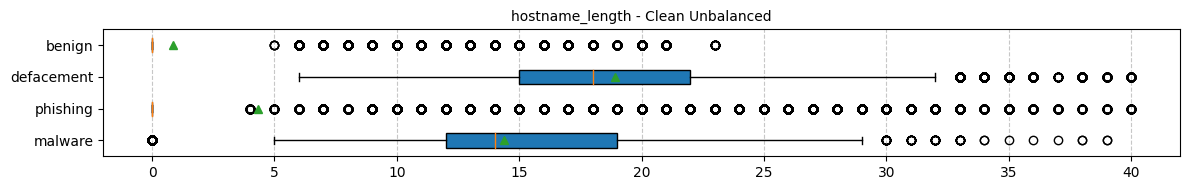

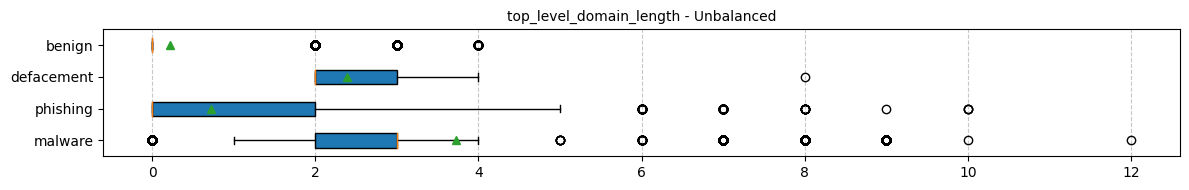

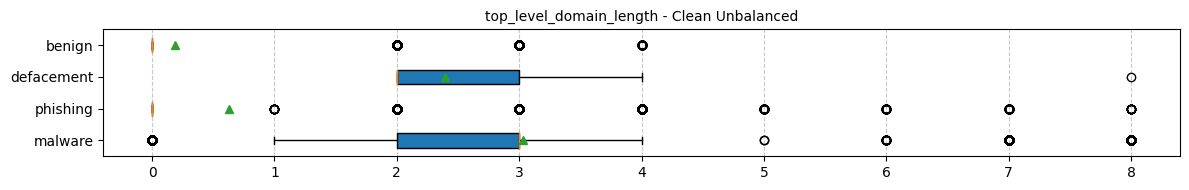

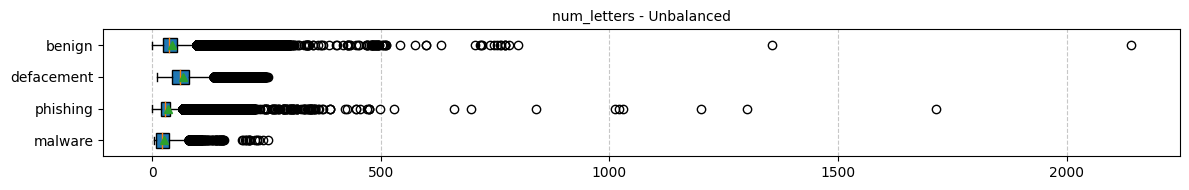

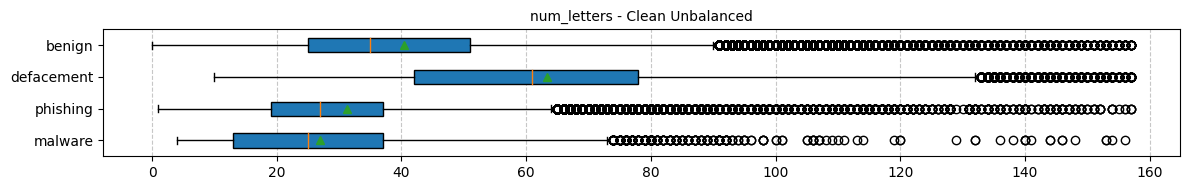

In [12]:
# We create two box plots for each of these features. The first is for the dataset with outliers, the second without them.
import matplotlib.pyplot as plt

features = ['url_entropy', 'num_digits', 'num_query_parameters', 'num_fragments', 'num_percent20', 'num_at_signs', 'dot_number', 'num_www', 'directory_num', 'count_percent', 'count_dash', 'hostname_length', 'top_level_domain_length', 'num_letters']
classes = df["type"].unique()

for feature in features:
    plt.figure(figsize=(12, 2))
    
    # First boxplot with x_train_unbalanced and y_train_unbalanced
    data = [x_train_unbalanced[y_train_unbalanced == class_label][feature].dropna() for class_label in classes]
    plt.boxplot(data, vert=False, patch_artist=True, showmeans=True, labels=classes)
    plt.title(f'{feature} - Unbalanced', fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Second boxplot with x_train_clean_unbalanced and y_train_clean_unbalanced
    plt.figure(figsize=(12, 2))
    data_clean = [x_train_clean_unbalanced[y_train_clean_unbalanced == class_label][feature].dropna() for class_label in classes]
    plt.boxplot(data_clean, vert=False, patch_artist=True, showmeans=True, labels=classes)
    plt.title(f'{feature} - Clean Unbalanced', fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [13]:
# one aspect that we notice from the above output is the imbalance, in terms of number of samples, of the malicious class compared to the benign one.
from utils.utils import balance_data_undersample_benign

x_train, y_train = balance_data_undersample_benign(x_train_unbalanced, y_train_unbalanced)
x_train_clean, y_train_clean = balance_data_undersample_benign(x_train_clean_unbalanced, y_train_clean_unbalanced) # senza outliers
printInfo("training balanced", y_train)
print()
printInfo("training cleaned balanced", y_train_clean)

training balanced samples [tot: 340872]:
 benign class: 170436 (50.00% of total)
 defacement class: 76246 (22.37% of total)
 malware class: 18916 (5.55% of total)
 phishing class: 75274 (22.08% of total)

training cleaned balanced samples [tot: 320672]:
 benign class: 160336 (50.00% of total)
 defacement class: 72954 (22.75% of total)
 malware class: 15824 (4.93% of total)
 phishing class: 71558 (22.32% of total)


Let's even try a different balancing strategy

In [14]:
from utils.utils import balance_data_undersample_plus_oversample

x_train2,y_train2 = balance_data_undersample_plus_oversample(x_train_unbalanced, y_train_unbalanced)
x_train2_clean,y_train2_clean = balance_data_undersample_plus_oversample(x_train_clean_unbalanced, y_train_clean_unbalanced)
printInfo("training balanced (oversampling)", y_train2)
print()


training balanced (oversampling) samples [tot: 1369836]:
 benign class: 342459 (25.00% of total)
 defacement class: 342459 (25.00% of total)
 malware class: 342459 (25.00% of total)
 phishing class: 342459 (25.00% of total)



## Random Forest

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.9476 ± 0.0014
Mean F1 Score: 0.9472 ± 0.0014
Mean AUC Score: 0.9892 ± 0.0006

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.97      0.97     85615
    phishing       0.98      0.99      0.99     19062
  defacement       0.98      0.91      0.94      4729
     malware       0.83      0.87      0.85     18818

    accuracy                           0.95    128224
   macro avg       0.94      0.94      0.94    128224
weighted avg       0.95      0.95      0.95    128224


AUC Score: 0.9890


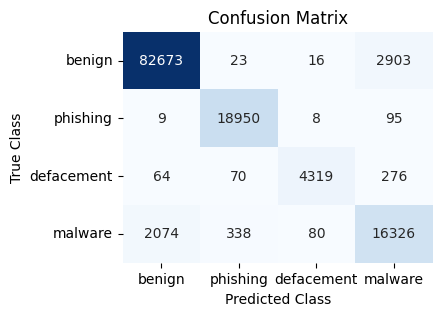

In [15]:
# balanced, with outliers
from sklearn.ensemble import RandomForestClassifier
from utils.utils import evaluate_model_with_cv
from joblib import dump

rf_classifier=evaluate_model_with_cv(x_train, y_train, RandomForestClassifier(), x_test, y_test)
# Save the trained model


In [ ]:
# balanced with second strategy, with outliers
from sklearn.ensemble import RandomForestClassifier
from utils.utils import evaluate_model_with_cv


rf_classifier_2=evaluate_model_with_cv(x_train2, y_train2, RandomForestClassifier(), x_test, y_test)


So the best overall is the one with the second strategy of sampling

Let's give some interpretability

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1. Crea l'Explainer SHAP
explainer = shap.TreeExplainer(rf_classifier_2)
x_sampled = x_test.sample(1000)

# 2. Calcola i valori SHAP per X_test
shap_values = explainer.shap_values(x_sampled)

# --- Classi testuali ---
class_names = ['benign', 'phishing', 'defacement', 'malware']

# Diagnosi delle dimensioni
print("Shape di x_sampled:", x_sampled.shape)
print("Tipo di shap_values:", type(shap_values))
print("Shape di shap_values:", shap_values.shape)

# Riorganizza i valori SHAP per ciascuna classe
# shap_values è (22, 4), quindi dobbiamo riorganizzarlo per ottenere (12, 22) per ogni classe
shap_values_per_class = np.moveaxis(shap_values, -1, 0)  # Dividi lungo l'ultima dimensione
print("Shape di shap_values_per_class:", shap_values_per_class.shape)  # (4, 12, 22)

# Visualizzazione
for i, class_name in enumerate(class_names):
    # Ottieni i valori SHAP per la classe corrente
    shap_values_class = shap_values_per_class[i]

    print(f"Shape di shap_values_class ({class_name}):", shap_values_class.shape)

    # Plot
    shap.summary_plot(shap_values_class, x_sampled, plot_type="bar", show=False)
    plt.title(f"SHAP Values - Classe {class_name}")
    plt.show()




# # B. Force Plot per una singola istanza
# index_istanza = 0
# classe_predetta = rf_classifier.predict(x_sampled)[index_istanza]
# indice_classe = class_names.index(classe_predetta)



# # C. Decision Plot per una singola istanza
# shap.decision_plot(explainer.expected_value[indice_classe], shap_values[indice_classe][index_istanza,:], x_test.iloc[index_istanza,:], feature_names=x_test.columns.tolist())

 

In [ ]:

abs_shap_values=np.abs(shap_values)
import plotly.express as px

mean_per_class = abs_shap_values.mean(axis=2)
print("Shape of mean_per_class:", mean_per_class.shape) 


# 2. Calcola la media su tutte le istanze per ogni feature
global_shap_values = mean_per_class.mean(axis=0)
print("Shape of global_shap_values:", global_shap_values.shape) 


feature_importance_dict={}


for i in range(len(x_test.columns)):
    feature_importance_dict[x_test.columns[i]]=global_shap_values[i]


feature_importance=pd.DataFrame.from_dict(feature_importance_dict, orient='index').reset_index()
feature_importance.columns = ['Feature', 'SHAP Importance'] #rinomina le colonne


print("\nfeature_importance:\n", feature_importance)


feature_importance=pd.DataFrame.from_dict(feature_importance_dict, orient='index').reset_index()
feature_importance.columns = ['Feature', 'SHAP Importance'] #rinomina le colonne
feature_importance=feature_importance.sort_values('SHAP Importance', ascending=False)

print("\nfeature_importance:\n", feature_importance)

fig = px.bar(feature_importance, 
             x='Feature', 
             y='SHAP Importance',
             title="Global Feature Importance - Tutte le Features")


fig.show()

Shape of mean_per_class: (10, 22)
Shape of global_shap_values: (22,)

feature_importance:
                     Feature  SHAP Importance
0                    ip_use         0.010989
1               url_entropy         0.025187
2                num_digits         0.030500
3      num_query_parameters         0.016036
4             num_fragments         0.000182
5             num_percent20         0.000172
6              num_at_signs         0.000116
7                  has_http         0.036294
8                 has_https         0.008819
9                dot_number         0.027201
10                  num_www         0.060355
11            directory_num         0.038361
12      embed_domain_number         0.015092
13            suspiciousurl         0.030184
14            count_percent         0.012127
15               count_dash         0.018418
16             is_shortened         0.003717
17          hostname_length         0.049410
18   first_directory_length         0.035410
19  top_l

shap_values shape: (1, 22, 4)
Predicted class: defacement
shap_values_for_class shape: (22,)


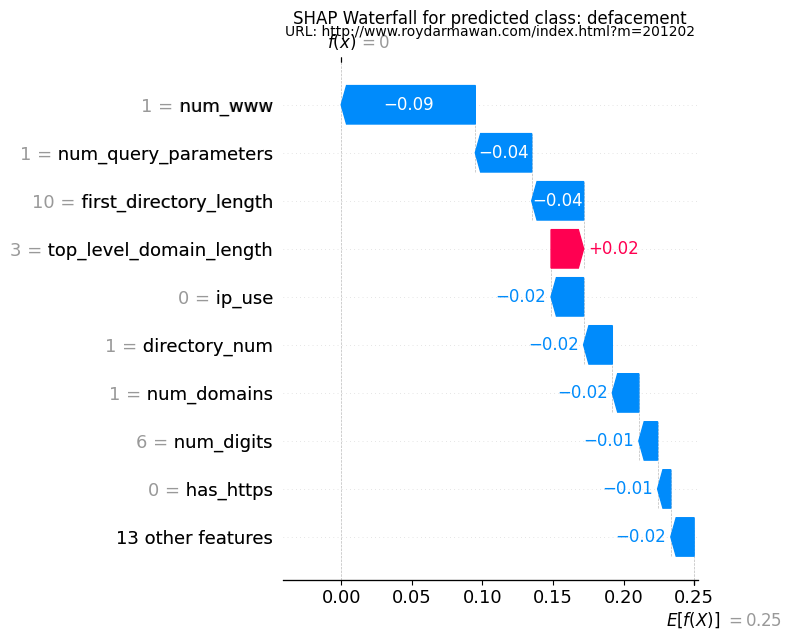


Top 10 features for this single-instance prediction:
                    Feature  Importance
10                  num_www    0.094995
3      num_query_parameters    0.039946
18   first_directory_length    0.036811
19  top_level_domain_length    0.023092
0                    ip_use    0.023026
11            directory_num    0.020353
21              num_domains    0.018785
2                num_digits    0.013288
8                 has_https    0.009359
9                dot_number    0.008341


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create the explainer
explainer = shap.TreeExplainer(rf_classifier_2)

# 2. Select a single instance from x_test (ensure it's 2D)
instance = x_test.iloc[[1]]

# (A) Recupera l'URL dal tuo DataFrame originale (ad es. df_raw) per questa stessa riga
#     Se nel tuo caso il DataFrame che contiene la colonna "url" si chiama diversamente, 
#     sostituisci "df_raw" con il nome appropriato.
url_value = df_raw.loc[instance.index[0], 'url']  # Assicurati che 'df_raw' abbia una colonna 'url'

# 3. Compute SHAP values (shape: (1, num_features, num_classes))
shap_values = explainer.shap_values(instance)
print("shap_values shape:", np.array(shap_values).shape)

# 4. Get the predicted class index (0=benign, 1=phishing, 2=defacement, 3=malware)
predicted_class = rf_classifier_2.predict(instance)[0]
class_names = ['benign', 'phishing', 'defacement', 'malware']
predicted_class_idx = class_names.index(predicted_class)
print("Predicted class:", predicted_class)

# 5. Isolate the SHAP values for this single instance and the predicted class
# shap_values[0] ha forma (num_features, 4). Prendi la colonna corrispondente a predicted_class_idx.
shap_values_for_class = shap_values[0][:, predicted_class_idx]
print("shap_values_for_class shape:", shap_values_for_class.shape)

# 6. Create a SHAP Explanation object
feature_names = list(x_test.columns)
exp = shap.Explanation(
    values=shap_values_for_class,
    base_values=explainer.expected_value[predicted_class_idx],
    data=instance.iloc[0],  # shape (num_features,)
    feature_names=feature_names
)

# 7. Plot a waterfall chart for this instance
plt.figure(figsize=(10, 7))
shap.plots.waterfall(exp, max_display=10, show=False)

# (B) Aggiunge un'annotazione con l'URL in alto al grafico
plt.annotate(
    text=f"URL: {url_value}",
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    ha='center',
    fontsize=10
)

plt.title(f"SHAP Waterfall for predicted class: {predicted_class}")
plt.tight_layout()
plt.show()

# 8. Tabular feature importance for this instance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_values_for_class)
}).sort_values('Importance', ascending=False)

print("\nTop 10 features for this single-instance prediction:")
print(feature_importance.head(10))

shap_values shape: (1, 22, 4)
Predicted class: defacement
shap_values_for_class shape: (22,)


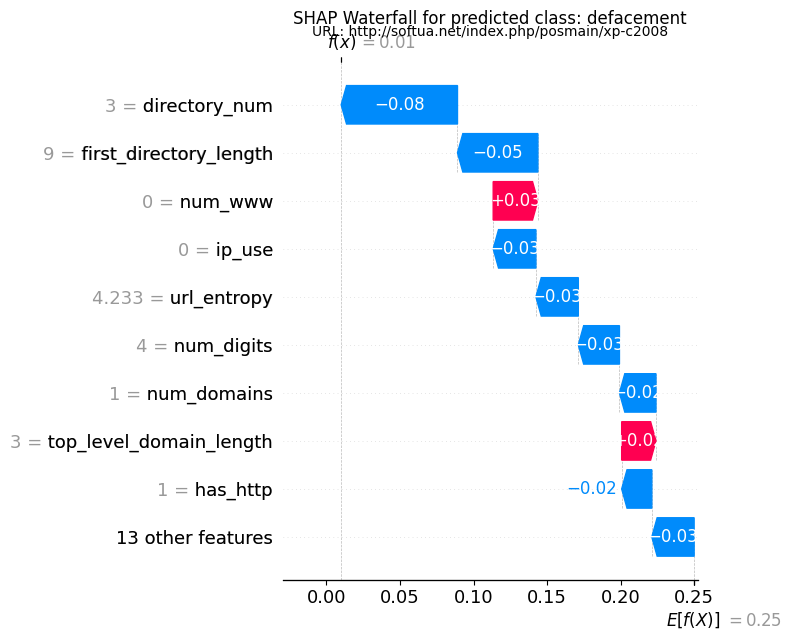


Top 10 features for this single-instance prediction:
                    Feature  Importance
11            directory_num    0.079081
18   first_directory_length    0.054653
10                  num_www    0.030380
0                    ip_use    0.029042
1               url_entropy    0.028841
2                num_digits    0.027962
21              num_domains    0.024836
19  top_level_domain_length    0.023312
7                  has_http    0.020481
8                 has_https    0.018785


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create the explainer
explainer = shap.TreeExplainer(rf_classifier_2)

# 2. Select a single instance from x_test (ensure it's 2D)
instance = x_test.iloc[[4]]

# (A) Recupera l'URL dal tuo DataFrame originale (ad es. df_raw) per questa stessa riga
#     Se nel tuo caso il DataFrame che contiene la colonna "url" si chiama diversamente, 
#     sostituisci "df_raw" con il nome appropriato.
url_value = df_raw.loc[instance.index[0], 'url']  # Assicurati che 'df_raw' abbia una colonna 'url'

# 3. Compute SHAP values (shape: (1, num_features, num_classes))
shap_values = explainer.shap_values(instance)
print("shap_values shape:", np.array(shap_values).shape)

# 4. Get the predicted class index (0=benign, 1=phishing, 2=defacement, 3=malware)
predicted_class = rf_classifier_2.predict(instance)[0]
class_names = ['benign', 'phishing', 'defacement', 'malware']
predicted_class_idx = class_names.index(predicted_class)
print("Predicted class:", predicted_class)

# 5. Isolate the SHAP values for this single instance and the predicted class
# shap_values[0] ha forma (num_features, 4). Prendi la colonna corrispondente a predicted_class_idx.
shap_values_for_class = shap_values[0][:, predicted_class_idx]
print("shap_values_for_class shape:", shap_values_for_class.shape)

# 6. Create a SHAP Explanation object
feature_names = list(x_test.columns)
exp = shap.Explanation(
    values=shap_values_for_class,
    base_values=explainer.expected_value[predicted_class_idx],
    data=instance.iloc[0],  # shape (num_features,)
    feature_names=feature_names
)

# 7. Plot a waterfall chart for this instance
plt.figure(figsize=(10, 7))
shap.plots.waterfall(exp, max_display=10, show=False)

# (B) Aggiunge un'annotazione con l'URL in alto al grafico
plt.annotate(
    text=f"URL: {url_value}",
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    ha='center',
    fontsize=10
)

plt.title(f"SHAP Waterfall for predicted class: {predicted_class}")
plt.tight_layout()
plt.show()

# 8. Tabular feature importance for this instance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_values_for_class)
}).sort_values('Importance', ascending=False)

print("\nTop 10 features for this single-instance prediction:")
print(feature_importance.head(10))

In [ ]:
from joblib import dump
dump(rf_classifier_2, 'random_forest_model.joblib')

['random_forest_model.joblib']

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.9447 ± 0.0010
Mean F1 Score: 0.9443 ± 0.0010
Mean AUC Score: 0.9880 ± 0.0007

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.96      0.97     85615
    phishing       0.97      0.99      0.98     19062
  defacement       0.97      0.90      0.94      4729
     malware       0.83      0.86      0.85     18818

    accuracy                           0.95    128224
   macro avg       0.94      0.93      0.93    128224
weighted avg       0.95      0.95      0.95    128224


AUC Score: 0.9884


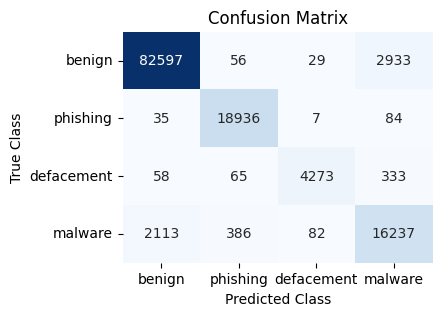

In [ ]:
# balanced, w/o outliers
from sklearn.ensemble import RandomForestClassifier
from utils.utils import evaluate_model_with_cv


rf_classifier = evaluate_model_with_cv(x_train_clean, y_train_clean, RandomForestClassifier(), x_test, y_test)


Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.9835 ± 0.0003
Mean F1 Score: 0.9836 ± 0.0003
Mean AUC Score: 0.9991 ± 0.0001

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.97      0.97     85615
    phishing       0.98      0.99      0.98     19062
  defacement       0.95      0.91      0.93      4729
     malware       0.84      0.85      0.85     18818

    accuracy                           0.95    128224
   macro avg       0.94      0.93      0.93    128224
weighted avg       0.95      0.95      0.95    128224


AUC Score: 0.9873


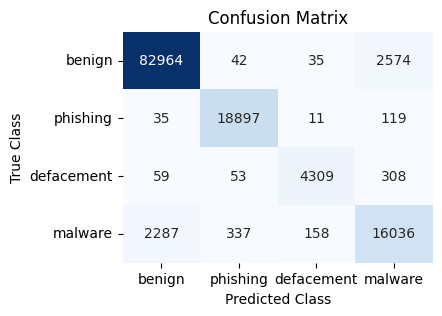

In [ ]:
# balanced with second strategy, w/o outliers
from sklearn.ensemble import RandomForestClassifier
from utils.utils import evaluate_model_with_cv


rf_classifier = evaluate_model_with_cv(x_train2_clean, y_train2_clean, RandomForestClassifier(), x_test, y_test)


## Logistic Regression

In [24]:
# we perform a data normalization, necessary for logistic regression
from sklearn.preprocessing import StandardScaler

COLUMNS_TO_IGNORE = ['ip_use', 'has_http', 'has_https', 'suspiciousurl'] # binary features

# defining features to normalize (all except those to ignore)
non_binary_columns = [col for col in x_train.columns if col not in COLUMNS_TO_IGNORE]

# scaling with StandardScaler
scaler = StandardScaler()

# training set with outliers
x_train_unbalanced_scaled = x_train_unbalanced.copy()
x_train_unbalanced_scaled[non_binary_columns] = scaler.fit_transform(x_train_unbalanced[non_binary_columns])

# training set w/o outliers
x_train_clean_unbalanced_scaled = x_train_clean_unbalanced.copy()
x_train_clean_unbalanced_scaled[non_binary_columns] = scaler.fit_transform(x_train_clean_unbalanced_scaled[non_binary_columns])

# test set (NOT MODIFIED)
x_test_scaled = x_test.copy()
x_test_scaled[non_binary_columns] = scaler.transform(x_test[non_binary_columns])

In [25]:
# binary regression cannot accept values ​​other than 0 and 1, so we change the classes to only two.
from utils.utils import balance_data_undersample_benign, merge_classes_to_binary

x_binary_train_scaled, y_binary_train = balance_data_undersample_benign(x_train_unbalanced_scaled, merge_classes_to_binary(y_train_unbalanced))
x_binary_train_clean_scaled, y_binary_train_clean = balance_data_undersample_benign(x_train_clean_unbalanced_scaled, merge_classes_to_binary(y_train_clean_unbalanced))

x_binary_train_clean_scaled2, y_binary_train_clean2 = balance_data_undersample_plus_oversample(x_train_clean_unbalanced_scaled, merge_classes_to_binary(y_train_clean_unbalanced))

y_binary_test = merge_classes_to_binary(y_test)

printInfo("training binary balanced", y_binary_train)
print()
printInfo("training binary cleaned balanced", y_binary_train_clean)

training binary balanced samples [tot: 340872]:
 benign class: 170436 (50.00% of total)
 malignant class: 170436 (50.00% of total)

training binary cleaned balanced samples [tot: 320660]:
 benign class: 160330 (50.00% of total)
 malignant class: 160330 (50.00% of total)


: 

In [ ]:
# showing the distribution of features with and without outliers (it takes about 30 seconds)
import matplotlib.pyplot as plt
import seaborn as sns

combined_data = pd.DataFrame()
for column in non_binary_columns:
    combined_data[column] = x_binary_train_scaled[column]
    combined_data["CLEANED -- " + column] = x_binary_train_clean_scaled[column]

columns_for_plot = []
for column in non_binary_columns:
    columns_for_plot.append(column)
    columns_for_plot.append("CLEANED -- " + column)

# Creazione del boxplot
plt.figure(figsize=(len(columns_for_plot) * 0.5, 6))
sns.boxplot(data=combined_data[columns_for_plot])
plt.title('Features after normalization', fontsize=14)
plt.xticks(rotation=90)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.8764 ± 0.0010
Mean F1 Score: 0.8762 ± 0.0010
Mean AUC Score: 0.9474 ± 0.0003

Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.91      0.91     85615
   malignant       0.82      0.84      0.83     42609

    accuracy                           0.88    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.88      0.89    128224


AUC Score: 0.9447


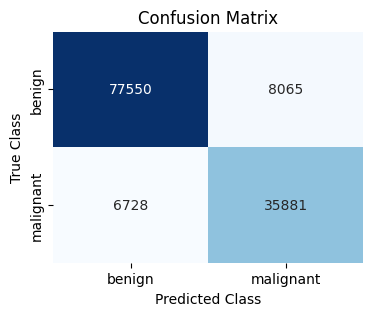

In [28]:
# balanced and normalized, with outliers
from sklearn.linear_model import LogisticRegression
from utils.utils import evaluate_model_with_cv

model = evaluate_model_with_cv(x_binary_train_scaled, y_binary_train, LogisticRegression(), x_test_scaled, y_binary_test, ['benign', 'malignant'])

['benign' 'malignant']


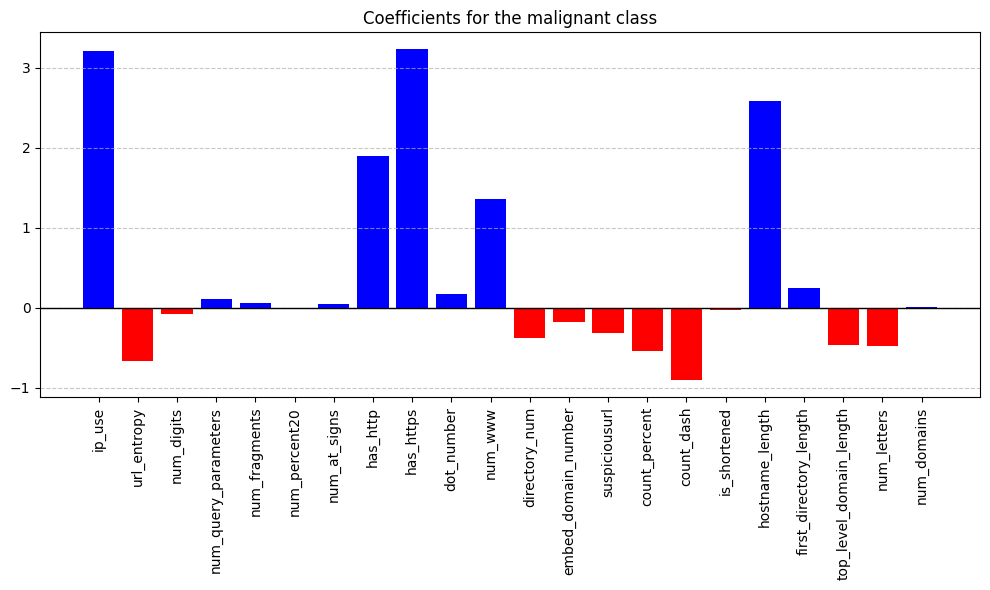

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(model.classes_)

coefs = model.coef_[0]
x_pos = np.arange(len(coefs))

# Colore rosso per i coeff. negativi, blu per i positivi
colors = ['red' if c < 0 else 'blue' for c in coefs]

plt.figure(figsize=(10, 6))
plt.bar(x_pos, coefs, color=colors)

# Linea orizzontale a 0 per evidenziare il passaggio da negativo a positivo
plt.axhline(y=0, color='black', linewidth=1)

# Aggiunta di una griglia (solo sull'asse Y, trattino puntinato)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(x_pos, x_binary_train_scaled.columns.to_list(), rotation=90)
plt.title('Coefficients for the malignant class')
plt.tight_layout()
plt.show()


Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.8781 ± 0.0010
Mean F1 Score: 0.8779 ± 0.0010
Mean AUC Score: 0.9521 ± 0.0009

Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.91      0.91     85615
   malignant       0.83      0.83      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224


AUC Score: 0.9441


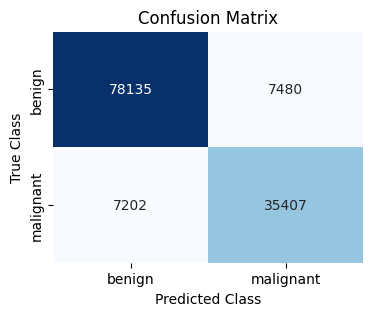

LogisticRegression()

In [ ]:
# balanced and normalized, without outliers
from sklearn.linear_model import LogisticRegression

evaluate_model_with_cv(x_binary_train_clean_scaled, y_binary_train_clean, LogisticRegression(), x_test_scaled, y_binary_test, ['benign', 'malignant'])

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.8783 ± 0.0004
Mean F1 Score: 0.8780 ± 0.0004
Mean AUC Score: 0.9525 ± 0.0003

Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.91      0.91     85615
   malignant       0.83      0.83      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224


AUC Score: 0.9439


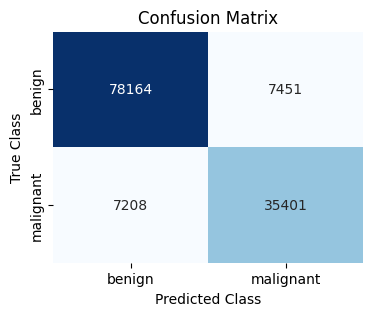

In [18]:
# balanced and normalized, without outliers, second strategy of balancing
from sklearn.linear_model import LogisticRegression

log_regr=evaluate_model_with_cv(x_binary_train_clean_scaled2, y_binary_train_clean2, LogisticRegression(), x_test_scaled, y_binary_test, ['benign', 'malignant'])

SHAP values shape: (1, 22)
Classe predetta: benign
shap_vals_for_instance shape: (22,)


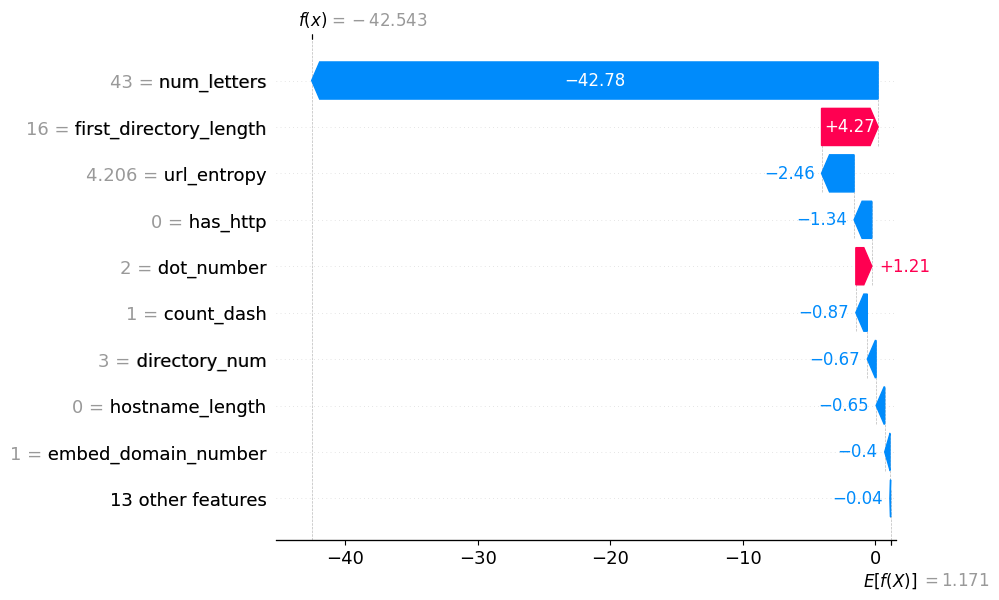


Top 10 features per questa singola istanza (Logistic Regression):
                   Feature  Importance
20             num_letters   42.775233
18  first_directory_length    4.273899
1              url_entropy    2.459206
7                 has_http    1.338609
9               dot_number    1.206909
15              count_dash    0.865404
11           directory_num    0.665238
17         hostname_length    0.648773
12     embed_domain_number    0.401347
10                 num_www    0.183940


In [20]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usa LinearExplainer per la logistic regression
explainer_lr = shap.LinearExplainer(log_regr, x_binary_train_clean_scaled2)

# Seleziona un'istanza dal test set (shape 1, n_features)
instance_lr = x_test.iloc[[0]]

# Calcola i valori SHAP per questa istanza (forma: (1, n_features))
shap_values_lr = explainer_lr.shap_values(instance_lr)
print("SHAP values shape:", np.array(shap_values_lr).shape)

# Classe predetta
predicted_class_lr = log_regr.predict(instance_lr)[0]
class_names = ['benign', 'malignant']
print("Classe predetta:", predicted_class_lr)

# In una logistic regression binaria, con LinearExplainer,
# shap_values_lr contiene già un solo set di valori: usiamo shap_values_lr[0].
shap_vals_for_instance = shap_values_lr[0]
print("shap_vals_for_instance shape:", shap_vals_for_instance.shape)

# Create Explanation
feature_names = list(x_test.columns)
exp_lr = shap.Explanation(
    values=shap_vals_for_instance,
    base_values=explainer_lr.expected_value,  # Non indicizzare
    data=instance_lr.iloc[0],
    feature_names=feature_names
)

# Visualizza il grafico waterfall
shap.plots.waterfall(exp_lr, max_display=10)

# Stampa le 10 feature più importanti
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_vals_for_instance)
}).sort_values('Importance', ascending=False)

print("\nTop 10 features per questa singola istanza (Logistic Regression):")
print(feature_importance_lr.head(10))

SHAP values shape: (1, 22)
Classe predetta: malignant
shap_vals_for_instance shape: (22,)


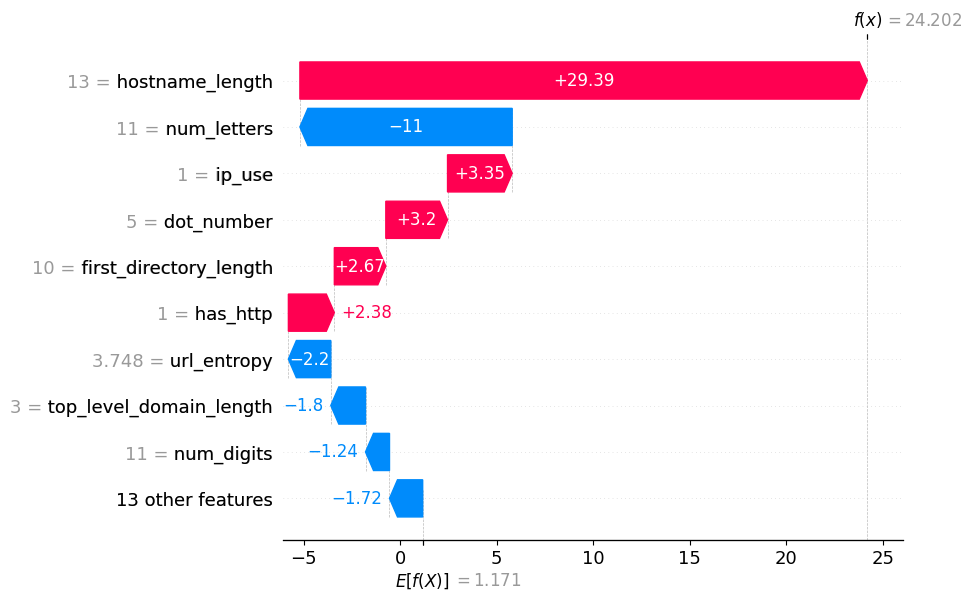


Top 10 features per questa singola istanza (Logistic Regression):
                    Feature  Importance
17          hostname_length   29.391495
20              num_letters   10.997103
0                    ip_use    3.349079
9                dot_number    3.197158
18   first_directory_length    2.667410
7                  has_http    2.379750
1               url_entropy    2.196903
19  top_level_domain_length    1.798217
2                num_digits    1.242702
21              num_domains    0.843031


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usa LinearExplainer per la logistic regression
explainer_lr = shap.LinearExplainer(log_regr, x_binary_train_clean_scaled2)

# Seleziona un'istanza dal test set (shape 1, n_features)
instance_lr = x_test.iloc[[4]]

# Calcola i valori SHAP per questa istanza (forma: (1, n_features))
shap_values_lr = explainer_lr.shap_values(instance_lr)
print("SHAP values shape:", np.array(shap_values_lr).shape)

# Classe predetta
predicted_class_lr = log_regr.predict(instance_lr)[0]
class_names = ['benign', 'malignant']
print("Classe predetta:", predicted_class_lr)

# In una logistic regression binaria, con LinearExplainer,
# shap_values_lr contiene già un solo set di valori: usiamo shap_values_lr[0].
shap_vals_for_instance = shap_values_lr[0]
print("shap_vals_for_instance shape:", shap_vals_for_instance.shape)

# Create Explanation
feature_names = list(x_test.columns)
exp_lr = shap.Explanation(
    values=shap_vals_for_instance,
    base_values=explainer_lr.expected_value,  # Non indicizzare
    data=instance_lr.iloc[0],
    feature_names=feature_names
)

# Visualizza il grafico waterfall
shap.plots.waterfall(exp_lr, max_display=10)

# Stampa le 10 feature più importanti
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_vals_for_instance)
}).sort_values('Importance', ascending=False)

print("\nTop 10 features per questa singola istanza (Logistic Regression):")
print(feature_importance_lr.head(10))

In [ ]:
import shap
import numpy as np
import pandas as pd
import plotly.express as px

# shap_values: array di forma (n_samples, n_features)
abs_shap_values = np.abs(shap_values)

# Media dei valori assoluti SHAP su tutte le istanze (axis=0)
global_shap_values = abs_shap_values.mean(axis=0)
print("Shape of global_shap_values:", global_shap_values.shape)

feature_importance_dict = {}
for i, col in enumerate(x_test.columns):
    feature_importance_dict[col] = global_shap_values[i]

feature_importance = pd.DataFrame.from_dict(feature_importance_dict, orient='index').reset_index()
feature_importance.columns = ['Feature', 'SHAP Importance']
print("\nfeature_importance:\n", feature_importance)

# Ordina le feature per importanza
feature_importance = feature_importance.sort_values('SHAP Importance', ascending=False)
print("\nfeature_importance:\n", feature_importance)

# Grafico con Plotly
fig = px.bar(feature_importance, 
             x='Feature', 
             y='SHAP Importance',
             title="Global Feature Importance - Logistic Regression")
fig.show()

## PCA

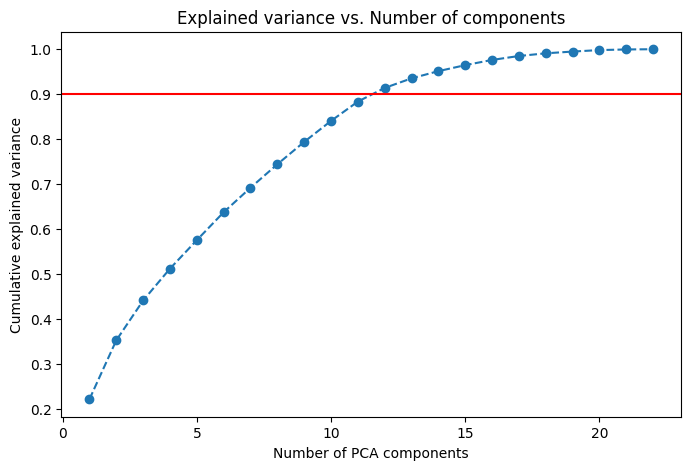

Cross-Validation F1-Weighted: 0.7893
Classification Report (Test Set):
              precision    recall  f1-score   support

      benign       0.85      0.92      0.88     85615
   malignant       0.80      0.67      0.73     42609

    accuracy                           0.84    128224
   macro avg       0.83      0.79      0.81    128224
weighted avg       0.83      0.84      0.83    128224


AUC Score: 0.8712


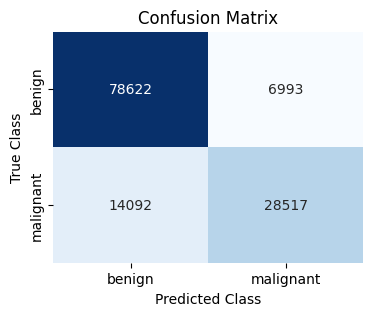

In [ ]:
# per logistic regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

COLUMNS_TO_IGNORE = ['ip_use', 'has_http', 'has_https', 'suspiciousurl']

# 1. prepare data
target_column = 'type'
columns_to_scale = [col for col in df.columns if col not in COLUMNS_TO_IGNORE + ['url', target_column]]

class_mapping = {
    'benign': 'benign',
    'defacement': 'malignant',
    'phishing': 'malignant',
    'malware': 'malignant'
}
df_binary = df.copy()
df_binary[target_column] = df[target_column].map(class_mapping)

X = df_binary.drop(columns=['url', target_column])
y = df_binary[target_column]

# 2. split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# 4. create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', COLUMNS_TO_IGNORE)
    ]
)

# 4.5. explained variance analysis
pca_temp = PCA()
pca_temp.fit(preprocessor.fit_transform(X_train))
explained_variance = np.cumsum(pca_temp.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs. Number of components')
plt.show()

# 5. create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# 6. cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1-Weighted: {scores.mean():.4f}")

# 7. final fit
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 8. evaluation
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_prob = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test.map({'benign': 0, 'malignant': 1}), y_prob)
print(f"\nAUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


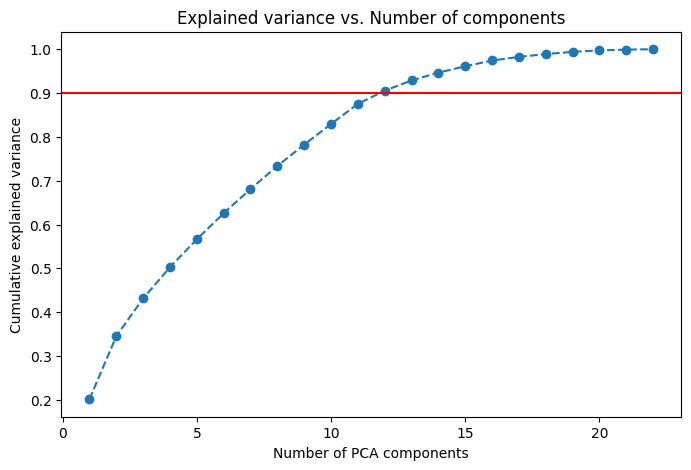

Cross-Validation F1-Weighted: 0.9067
Classification Report (Test Set):
              precision    recall  f1-score   support

      benign       0.98      0.91      0.94     85615
  defacement       0.93      0.97      0.95     19062
     malware       0.82      0.92      0.87      4729
    phishing       0.69      0.84      0.75     18818

    accuracy                           0.91    128224
   macro avg       0.85      0.91      0.88    128224
weighted avg       0.92      0.91      0.91    128224



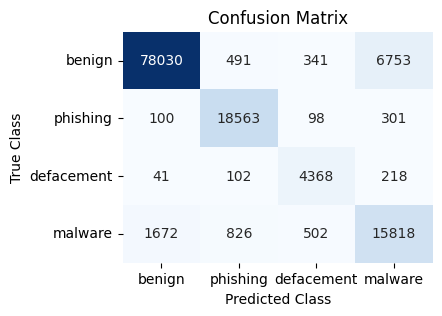

In [ ]:
# random forest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

COLUMNS_TO_IGNORE = ['ip_use', 'has_http', 'has_https', 'suspiciousurl']

# 1. prepare data
target_column = 'type'
columns_to_scale = [col for col in df.columns if col not in COLUMNS_TO_IGNORE + ['url', target_column]]

X = df.drop(columns=['url', target_column])
y = df[target_column]

# 2. split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 3. apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# 4. create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', COLUMNS_TO_IGNORE)
    ]
)

# 4.5. explained variance analysis
pca_temp = PCA()
pca_temp.fit(preprocessor.fit_transform(X_train))
explained_variance = np.cumsum(pca_temp.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs. Number of components')
plt.show()

# 5. create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 6. cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-Validation F1-Weighted: {scores.mean():.4f}")

# 7. final fit
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 8. evaluation
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['benign', 'phishing', 'defacement', 'malware'], yticklabels=['benign', 'phishing', 'defacement', 'malware'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()
